In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
np.random.seed(0) #for reproducibility

In [36]:
# Dogs : higher ear flapiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flapiness_index = np.random.normal(loc=8, scale=1, size=10)

In [37]:
# cats: lower ear flapiness index, higher whisker length

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flapiness_index = np.random.normal(loc=5,scale=1,size=10)

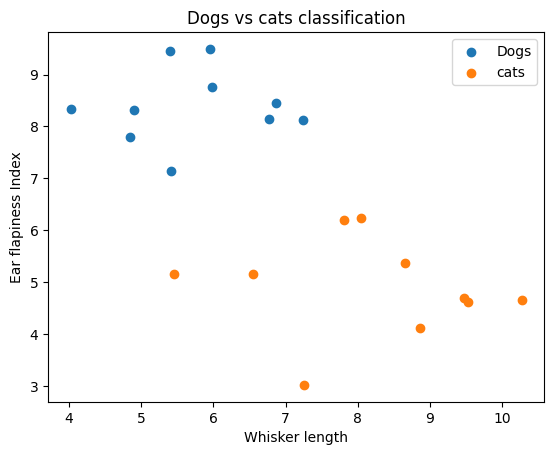

In [38]:
# plot the data points
plt.scatter(dogs_whisker_length, dogs_ear_flapiness_index, label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flapiness_index,label='cats')
plt.xlabel('Whisker length')
plt.ylabel('Ear flapiness Index')
plt.title('Dogs vs cats classification')
plt.legend()
plt.show()

In [39]:
# implementing a random linear classifier algorithms

def random_linear_classifier(data_dogs, data_cats, k, d):
    # d is the number of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta  # Fixed: Assign theta to best_theta
            best_theta0 = theta0  # Keep theta0 as the best if the error is smaller
    
    return best_theta, best_theta0

In [40]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1  # Increment error if condition is not met
    
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1  # Increment error for the incorrect classification
    
    return error
        

In [41]:

dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flapiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flapiness_index)).T

In [42]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [43]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [44]:
k=100 # Numbers of iterations
d = 2
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)

In [45]:
best_theta

array([-1.07075262,  1.05445173])

In [47]:
best_theta0

-0.40317694697317963

In [48]:
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals-(best_theta0/best_theta[1])


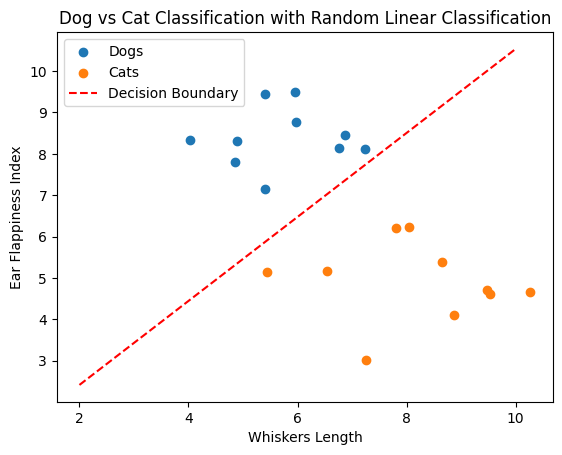

In [49]:
plt.scatter(dogs_whisker_length, dogs_ear_flapiness_index, label='Dogs')
plt.scatter(cats_whisker_length,cats_ear_flapiness_index,label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--',label='Decision Boundary')
plt.xlabel('Whiskers Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classification')
plt.legend()
plt.show()
